####  Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max.columns",None)

In [2]:
loanData = pd.read_csv("loan.csv")


C:\Users\91983\AppData\Local\Temp\ipykernel_16388\3598964893.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData = pd.read_csv("loan.csv")


In [6]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Droping all the columns which has only null values

In [4]:
loanData = loanData.dropna(axis=1,how="all")

In [5]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

#### looking for different loan status

In [7]:
loanData.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [8]:
loanData.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<Axes: >

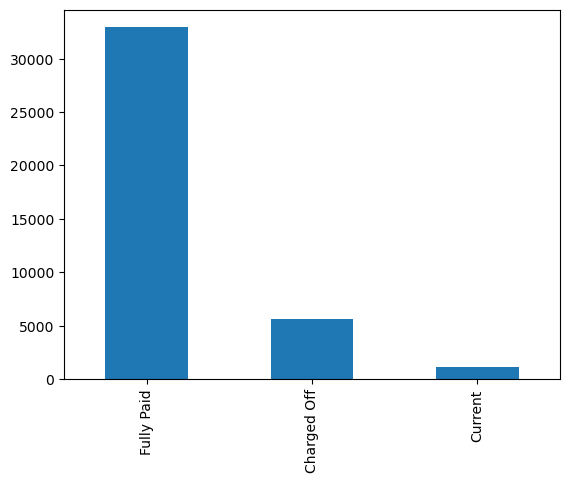

In [9]:
loanData.loan_status.value_counts().plot.bar()


In [10]:
defaulterdata = loanData[loanData.loan_status == 'Charged Off']

In [11]:
defaulterdata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.627000e+03,5.627000e+03,5627.000000,5627.000000,5627.000000,5627.000000,5.627000e+03,5627.000000,5627.000000,5627.000000,2142.000000,578.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.0,5627.0,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5621.0,5627.0,5627.0,5621.0,5627.0,5509.000000,5626.0
mean,6.978440e+05,8.677521e+05,12104.385108,11753.398792,10864.521324,336.175006,6.242730e+04,14.000624,0.170606,1.058113,36.157330,74.679931,9.178070,0.084770,13514.243647,21.427581,0.0,0.0,6838.030941,6367.470474,3967.177947,2194.459385,4.291692,672.101872,87.565940,326.020833,0.0,1.0,0.0,0.0,0.0,0.067163,0.0
std,2.163767e+05,2.723270e+05,8085.732038,7760.516335,7661.750540,217.051841,4.777601e+04,6.585577,0.534986,1.154136,22.679333,41.258365,4.525937,0.284873,15164.117475,11.447427,0.0,0.0,6615.858854,6490.913020,3963.430777,2551.973930,12.815790,1720.742949,386.590605,528.983051,0.0,0.0,0.0,0.0,0.0,0.251773,0.0
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,22.790000,4.080000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.297245e+05,6.849050e+05,5600.000000,5575.000000,5000.000000,168.555000,3.700000e+04,9.050000,0.000000,0.000000,17.000000,53.250000,6.000000,0.000000,3968.000000,13.000000,0.0,0.0,2215.575000,1865.910000,1205.780000,555.010000,0.000000,0.000000,0.000000,112.885000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.969370e+05,8.881580e+05,10000.000000,10000.000000,9401.209477,293.870000,5.300000e+04,14.290000,0.000000,1.000000,34.000000,92.000000,8.000000,0.000000,9211.000000,20.000000,0.0,0.0,4839.000000,4345.740000,2729.590000,1288.260000,0.000000,173.040000,2.513200,238.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.548760e+05,1.066578e+06,16500.000000,16000.000000,15000.000000,457.840000,7.500000e+04,19.290000,0.000000,2.000000,53.000000,105.000000,12.000000,0.000000,17518.000000,28.000000,0.0,0.0,9191.705000,8544.850000,5341.130000,2801.615000,0.000000,595.655000,9.365000,405.705000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,1.250000e+06,29.850000,8.000000,8.000000,107.000000,129.000000,38.000000,2.000000,148829.000000,74.000000,0.0,0.0,51745.450000,51671.580000,31115.810000,22122.300000,180.200000,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


(array([343., 425., 611., 741., 880., 832., 820., 685., 245.,  45.]),
 array([ 0.   ,  2.985,  5.97 ,  8.955, 11.94 , 14.925, 17.91 , 20.895,
        23.88 , 26.865, 29.85 ]),
 <BarContainer object of 10 artists>)

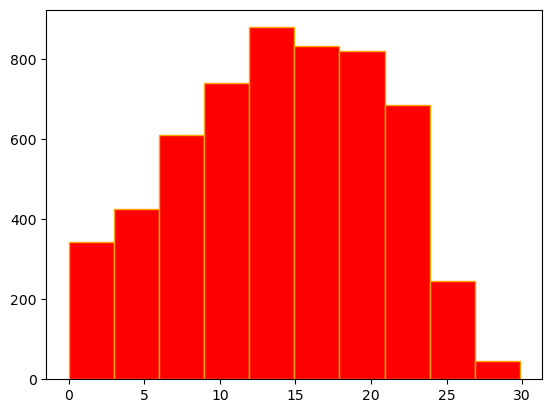

In [69]:
plt.hist(defaulterdata.dti,bins=10,edgecolor='Orange',color='red')

In [12]:
defaulterdata.dti.describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [13]:
loanData.groupby(loanData.loan_status)['dti'].mean()

loan_status
Charged Off    14.000624
Current        14.750009
Fully Paid     13.148421
Name: dti, dtype: float64

In [75]:
loanData.annual_inc.isnull()

False

In [101]:
pd.pivot_table(data= loanData,values=['annual_inc','dti','loan_amnt','int_rate'],index=['loan_status'],aggfunc='mean')

,annual_inc,dti,int_rate,loan_amnt
loan_status,,,,
Charged Off,62427.298034,14.000624,13.820432,12104.385108
Current,75430.665105,14.750009,15.031465,17053.991228
Fully Paid,69862.503328,13.148421,11.609761,10866.455994


In [14]:
loanData.int_rate = loanData.int_rate.apply(lambda x:x[:-1])



In [15]:
loanData.int_rate = loanData.int_rate.astype(float)

In [16]:
loanData.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [107]:
?loanData.drop_duplicates

In [17]:
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [44]:
data = loanData.groupby("loan_status")["int_rate","annual_inc"]

C:\Users\91983\AppData\Local\Temp\ipykernel_16388\1261301639.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = loanData.groupby("loan_status")["int_rate","annual_inc"]


In [39]:
data['int_rate']

loan_status
Charged Off    13.820432
Current        15.031465
Fully Paid     11.609761
Name: int_rate, dtype: float64

In [45]:
plt.scatter(data['int_rate'],data['annual_inc'])

IndexError: Column(s) ['int_rate', 'annual_inc'] already selected

In [46]:
x = data['int_rate']
y = data['annual_inc']
  
# first plot with X and Y data
plt.plot(y, x)
  
#x1 = [2, 4, 6, 8]
#y1 = [3, 5, 7, 9]
  
# second plot with x1 and y1 data
#plt.plot(x1, y1, '-.')
  
#plt.xlabel("X-axis data")
#plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

IndexError: Column(s) ['int_rate', 'annual_inc'] already selected

In [43]:
data.annual_inc

loan_status
Charged Off    62427.298034
Current        75430.665105
Fully Paid     69862.503328
Name: annual_inc, dtype: float64

Drop Column:
      tax_liens: All values are 0.0 or nan,hence it doesnot impact any of our analysis
      url : It contains only links which is of no value to us
      id
      member_id
      
      
      
      
Analysing only on the data which is not 'fully paid'
      loanData = loanData[loanData.loan_status != 'Fully Paid']
      
      
Analysing the frequency of  fully paid ,defaulter and current
